In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

In [2]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [3]:
def predict(X,weights):
    """X -> mx(n+1) matrix, w -->(nX1,) vector"""
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [4]:
def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

In [5]:
def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [6]:
def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    #Init Weights 0
    weights = np.zeros(X.shape[1]) #n+1 entires
    
    
    #Iterate over all epochs and make updates
    
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

In [46]:
# X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=42)
X,Y = make_blobs(n_samples=500, centers=2,n_features=2,random_state=6)
print(X.shape,Y.shape)

(500, 2) (500,)


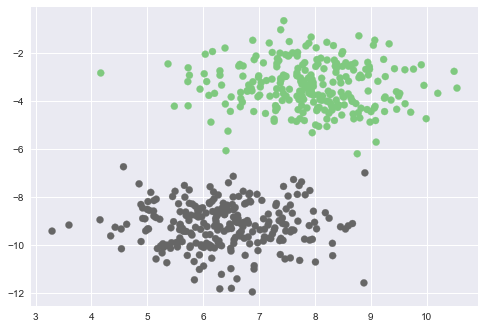

In [47]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap= plt.cm.Accent)
plt.show()

In [54]:
weights = train(X,Y,learning_rate=0.1,maxEpochs=1000)

Epoch 0 Loss 0.5430
Epoch 10 Loss 0.1586
Epoch 20 Loss 0.1014
Epoch 30 Loss 0.0775
Epoch 40 Loss 0.0642
Epoch 50 Loss 0.0556
Epoch 60 Loss 0.0495
Epoch 70 Loss 0.0450
Epoch 80 Loss 0.0415
Epoch 90 Loss 0.0387
Epoch 100 Loss 0.0364
Epoch 110 Loss 0.0345
Epoch 120 Loss 0.0328
Epoch 130 Loss 0.0314
Epoch 140 Loss 0.0302
Epoch 150 Loss 0.0291
Epoch 160 Loss 0.0281
Epoch 170 Loss 0.0272
Epoch 180 Loss 0.0265
Epoch 190 Loss 0.0257
Epoch 200 Loss 0.0251
Epoch 210 Loss 0.0245
Epoch 220 Loss 0.0240
Epoch 230 Loss 0.0235
Epoch 240 Loss 0.0230
Epoch 250 Loss 0.0226
Epoch 260 Loss 0.0222
Epoch 270 Loss 0.0218
Epoch 280 Loss 0.0215
Epoch 290 Loss 0.0211
Epoch 300 Loss 0.0208
Epoch 310 Loss 0.0205
Epoch 320 Loss 0.0203
Epoch 330 Loss 0.0200
Epoch 340 Loss 0.0198
Epoch 350 Loss 0.0195
Epoch 360 Loss 0.0193
Epoch 370 Loss 0.0191
Epoch 380 Loss 0.0189
Epoch 390 Loss 0.0187
Epoch 400 Loss 0.0185
Epoch 410 Loss 0.0183
Epoch 420 Loss 0.0182
Epoch 430 Loss 0.0180
Epoch 440 Loss 0.0179
Epoch 450 Loss 0.0177

In [55]:
def getPredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))

    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [56]:
x1 = np.linspace(3,11,10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

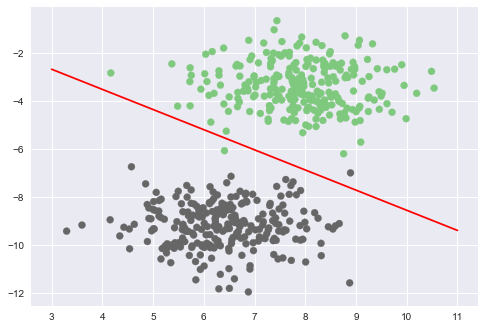

In [57]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [58]:
# Find the accuracy!
Y_ = getPredictions(X,weights,labels=True)
training_acc = np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

0.996
